In [1]:
pip install -U scikit-tda

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 33.8 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=775ba2b6a1210eff25bb5c8c4289ff276037a2f1047902df39768223af2b4ed6
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import sparse
import PIL
import time

from persim import plot_diagrams
from ripser import ripser, lower_star_img

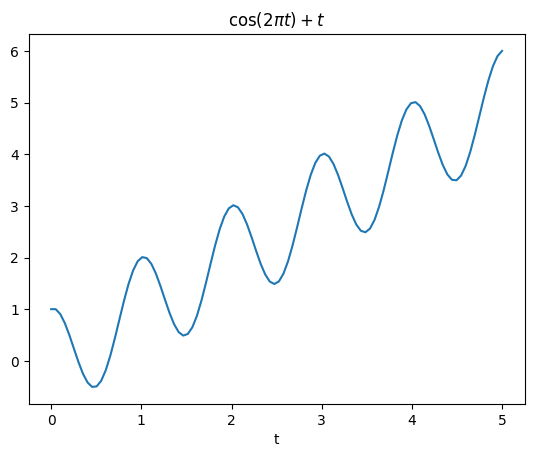

In [4]:
N = 100 #The number of points
t = np.linspace(0, 5, N)
x = np.cos(2*np.pi*t) + t

plt.plot(t, x)
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

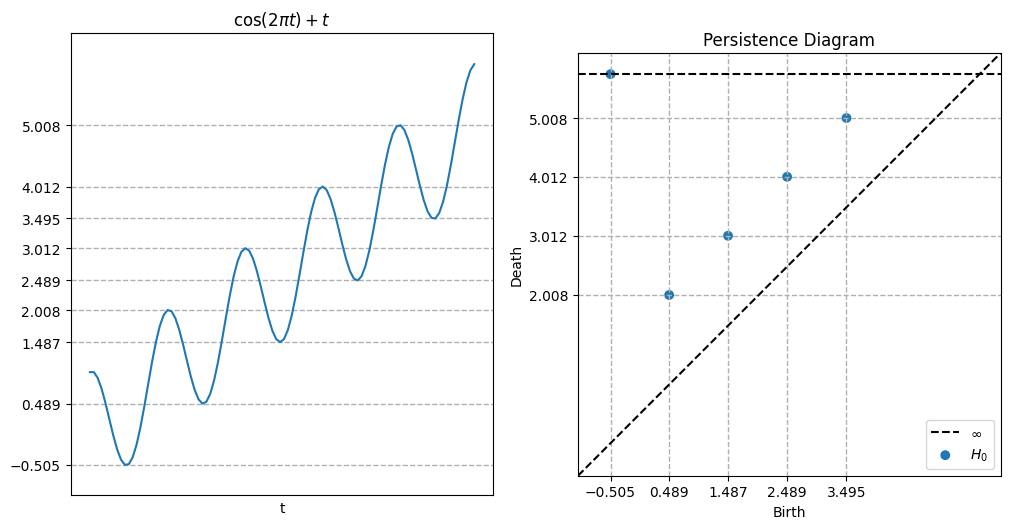

In [8]:
# Add edges between adjacent points in the time series, with the "distance"
# along the edge equal to the max value of the points it connects
I = np.arange(N-1)
J = np.arange(1, N)
V = np.maximum(x[0:-1], x[1::])
# Add vertex birth times along the diagonal of the distance matrix
I = np.concatenate((I, np.arange(N)))
J = np.concatenate((J, np.arange(N)))
V = np.concatenate((V, x))
#Create the sparse distance matrix
D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
dgm0 = ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]
dgm0 = dgm0[dgm0[:, 1]-dgm0[:, 0] > 1e-3, :]
allgrid = np.unique(dgm0.flatten())
allgrid = allgrid[allgrid < np.inf]
xs = np.unique(dgm0[:, 0])
ys = np.unique(dgm0[:, 1])
ys = ys[ys < np.inf]

#Plot the time series and the persistence diagram
plt.figure(figsize=(12, 6))
ylims = [-1, 6.5]
plt.subplot(121)
plt.plot(t, x)
ax = plt.gca()
ax.set_yticks(allgrid)
ax.set_xticks([])
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plt.title("$\\cos(2 \pi t) + t$")
plt.xlabel("t")

plt.subplot(122)
ax = plt.gca()
ax.set_yticks(ys)
ax.set_xticks(xs)
plt.ylim(ylims)
plt.grid(linewidth=1, linestyle='--')
plot_diagrams(dgm0, size=50)
plt.title("Persistence Diagram")

plt.show()

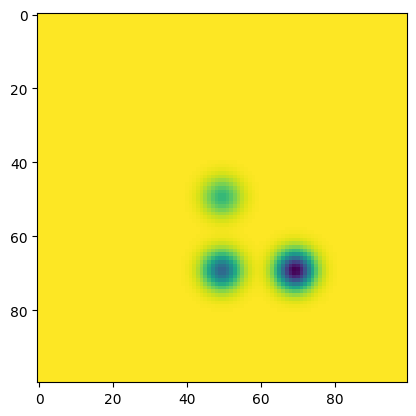

In [9]:
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))
img = -x1[None, :]*x1[:, None] - 2*x1[None, :]*x2[:, None] - 3*x2[None, :]*x2[:, None]
plt.imshow(img)
plt.show()

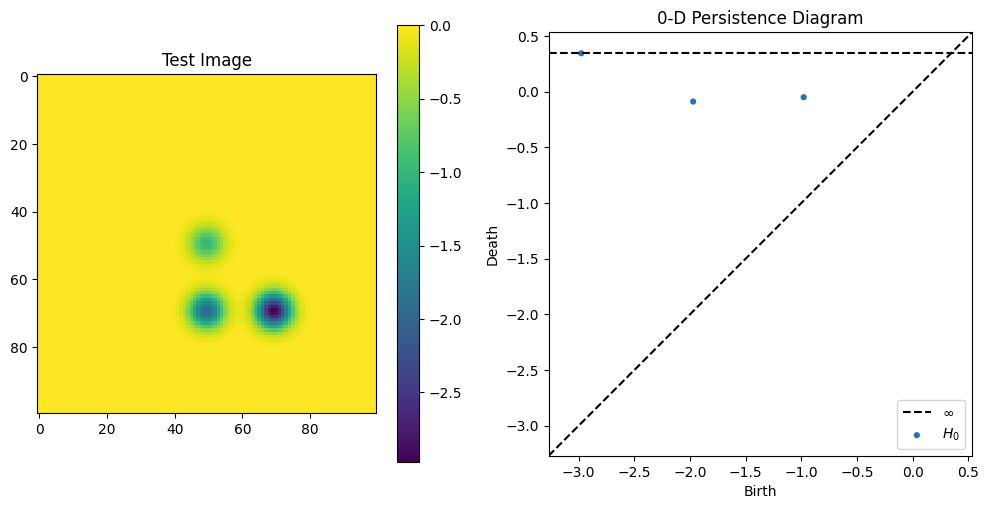

In [10]:
dgm = lower_star_img(img)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img)
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

For this part, you need to upload the corresponding `.jpg` images to Google Collab

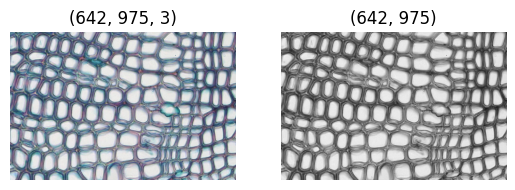

In [12]:
cells_original = plt.imread("Cells.jpg")
cells_grey = np.asarray(PIL.Image.fromarray(cells_original).convert('L'))

plt.subplot(121)
plt.title(cells_original.shape)
plt.imshow(cells_original)
plt.axis('off')
plt.subplot(122)
plt.title(cells_grey.shape)
plt.imshow(cells_grey, cmap='gray')
plt.axis('off')
plt.show()

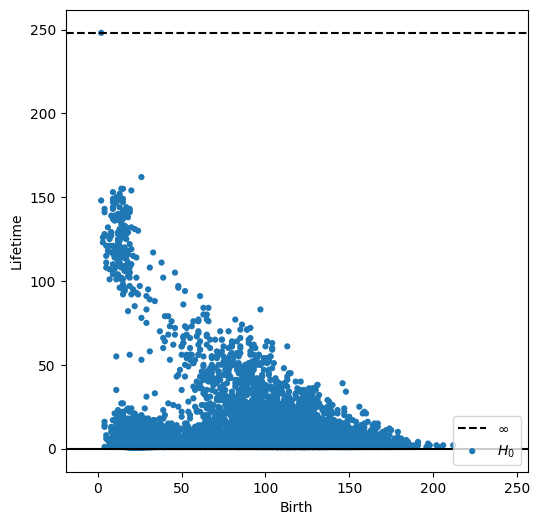

In [13]:
dgm = lower_star_img(-cells_grey)

plt.figure(figsize=(6, 6))
plot_diagrams(dgm, lifetime=True)
plt.show()

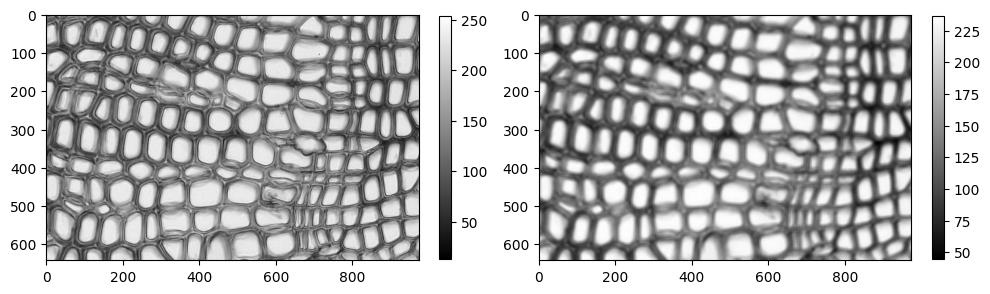

In [14]:
smoothed = ndimage.uniform_filter(cells_grey.astype(np.float64), size=10)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
im = plt.imshow(cells_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

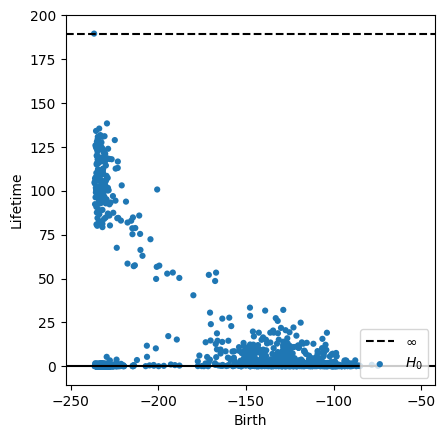

In [15]:
dgm = lower_star_img(-smoothed)
plot_diagrams(dgm, lifetime=True)
plt.show()

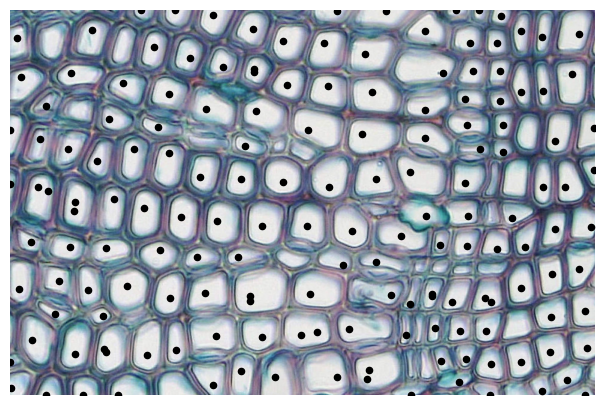

In [16]:
thresh = 70
idxs = np.arange(dgm.shape[0])
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

plt.figure(figsize=(8, 5))
plt.imshow(cells_original)

X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()

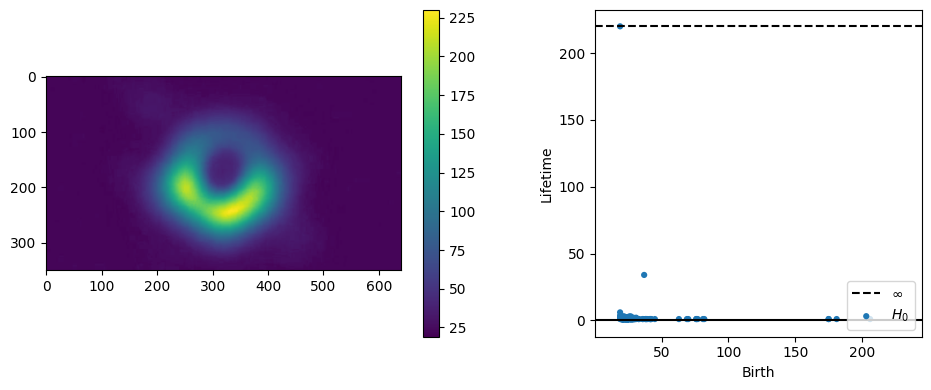

In [18]:
blackhole_original = plt.imread("BlackHole.jpg")
blackhole_grey = np.asarray(PIL.Image.fromarray(blackhole_original).convert('L'))
I = lower_star_img(blackhole_grey)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(blackhole_grey)
plt.colorbar()
plt.subplot(122)
plot_diagrams(I, lifetime=True)
plt.tight_layout()
plt.show()

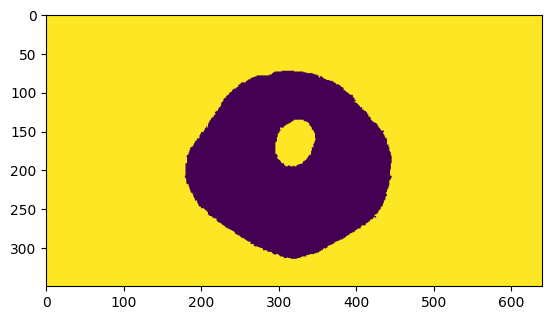

In [20]:
plt.figure()
plt.imshow(blackhole_grey < 50)